In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


standard deviation is very high so data is scattered

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


no null values and data type for everything except 1st column is float

In [5]:
df.value_counts()

Unnamed: 0  TV     radio  newspaper  sales
200         232.1  8.6    8.7        13.4     1
63          239.3  15.5   27.3       15.7     1
73          26.8   33.0   19.3       8.8      1
72          109.8  14.3   31.7       12.4     1
71          199.1  30.6   38.7       18.3     1
                                             ..
131         0.7    39.6   8.7        1.6      1
130         59.6   12.0   43.1       9.7      1
129         220.3  49.0   3.2        24.7     1
128         80.2   0.0    9.2        8.8      1
1           230.1  37.8   69.2       22.1     1
Length: 200, dtype: int64

In [6]:
#all distinct values

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
for i in df.columns:
    print(np.where(df[i]==0))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([127], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [9]:
##radio column contains value as 0

# EDA

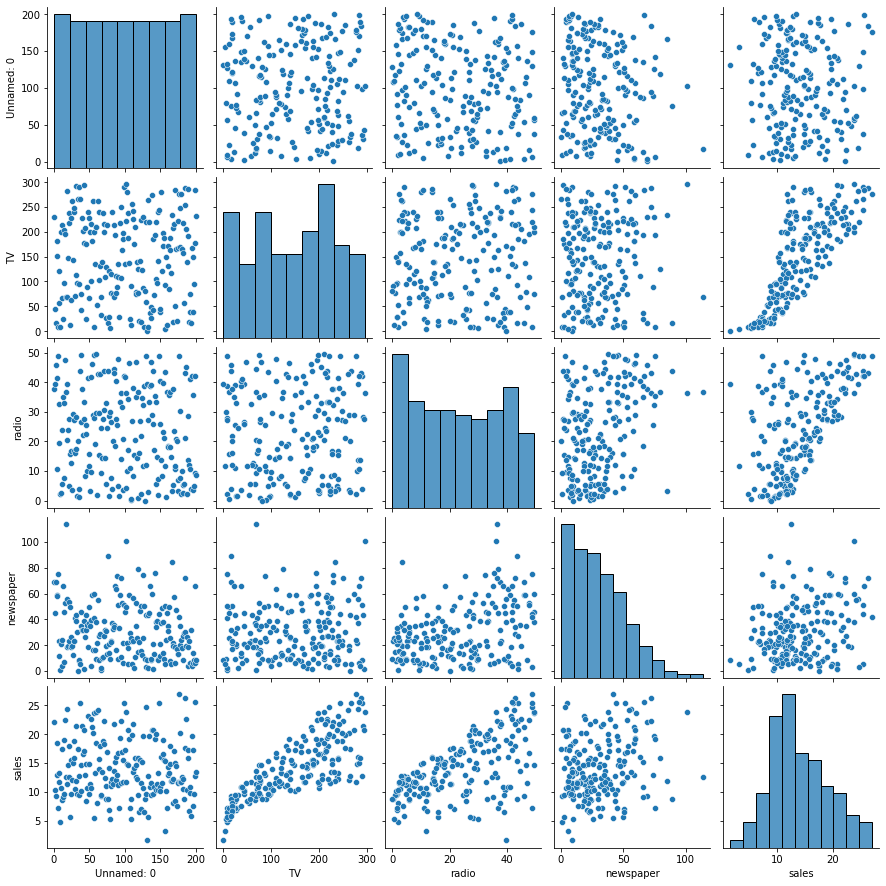

In [10]:
sns.pairplot(df)

In [11]:
##sales value increses with TV and radio

<AxesSubplot:xlabel='TV', ylabel='Density'>

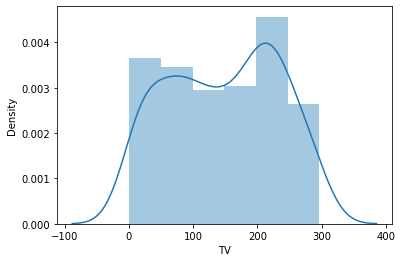

In [12]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

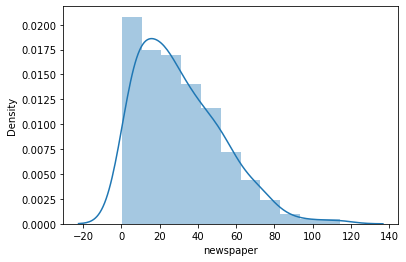

In [13]:
sns.distplot(df['newspaper'])

In [14]:
##data is Left skewed

<AxesSubplot:xlabel='radio', ylabel='Density'>

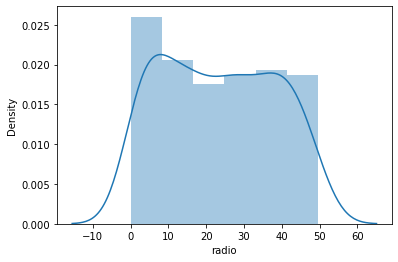

In [15]:
sns.distplot(df['radio'])

In [16]:
#majority of values lie between 0-10

<AxesSubplot:xlabel='sales', ylabel='Density'>

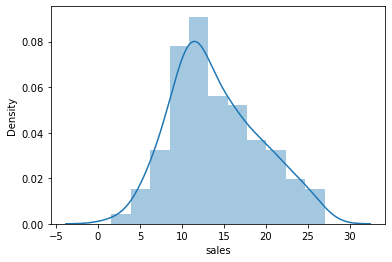

In [17]:
sns.distplot(df['sales'])

In [18]:
##data is distributed between range 2-27

# Correlation

In [19]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [20]:
##tv is highly correlated to sales

<AxesSubplot:>

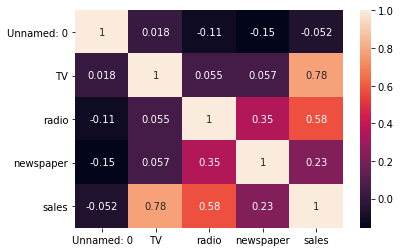

In [21]:
sns.heatmap(df.corr(),annot=True)

In [22]:
##there is no correlation to the first column

In [23]:
##data-cleaning
df=df.iloc[:,1:]

In [24]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [25]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [26]:
import numpy as np
df.skew()
for col in df.skew().index:
    if col in df.columns:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])

In [27]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

<AxesSubplot:xlabel='TV'>

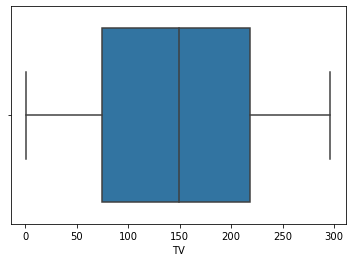

In [28]:
##checking outliers
sns.boxplot(df['TV'])

<AxesSubplot:xlabel='newspaper'>

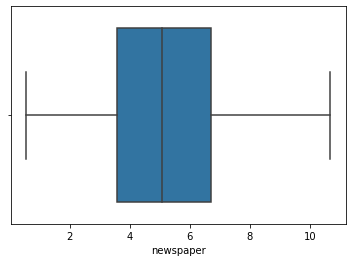

In [29]:
sns.boxplot(df['newspaper'])

<AxesSubplot:xlabel='radio'>

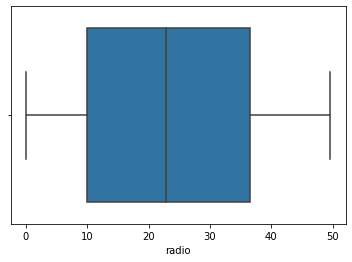

In [30]:
sns.boxplot(df['radio'])

In [31]:
##there are not much outliers in the given dataset

In [32]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape,y.shape)

(200, 3) (200,)


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [57]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=43,test_size=0.20)

In [53]:
def fun(f):
    f.fit(train_x,train_y)
    pred=f.predict(test_x)
    print("MSE=",mean_squared_error(test_y,pred))
    print("r2 score=",r2_score(test_y,pred))

In [54]:
from sklearn.model_selection import cross_val_score,KFold

In [55]:
def cvs(m):
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

In [58]:
lr=LinearRegression()
fun(lr)
cvs(lr)

MSE= 2.0637159157644644
r2 score= 0.9283082849976607
[0.87809171 0.91744186 0.92982697 0.81591747 0.89538764]
0.8873331295445761


In [59]:
from sklearn.linear_model import Lasso,Ridge

In [60]:
from sklearn.model_selection import GridSearchCV
param={'alpha':[0.001,0.01,0.1,1]}
gd=GridSearchCV(Lasso(),param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'alpha': 0.1}


In [61]:
train_x.shape

(160, 3)

In [62]:
train_y.shape

(160,)

In [63]:
l=Lasso(alpha=0.1)

In [66]:
fun(l)
cvs(l)

MSE= 2.132902335940571
r2 score= 0.9259048082984658
[0.88116506 0.91590917 0.93320601 0.81757164 0.89454442]
0.8884792606387284


In [67]:
param={'alpha':[0.001,0.01,0.1,1]}
gd=GridSearchCV(Ridge(),param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'alpha': 1}


In [69]:
r=Ridge(alpha=1)
fun(r)
cvs(r)

MSE= 2.077730142907226
r2 score= 0.9278214428065324
[0.87811605 0.9169339  0.93091865 0.81523194 0.89575154]
0.8873904144766908


In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [72]:
dtr=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()

In [73]:
param={'kernel':['linear','rbf','poly','sigmoid']}
gd=GridSearchCV(svr,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'kernel': 'rbf'}


In [76]:
param={'splitter':['best','random'],'max_features':['auto','sqrt','log2']}
gd=GridSearchCV(dtr,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'max_features': 'auto', 'splitter': 'best'}


In [77]:
dtr=DecisionTreeRegressor(splitter='best',max_features='auto')

In [78]:
fun(dtr)
cvs(dtr)

MSE= 0.6852499999999997
r2 score= 0.9761950046854414
[0.96112773 0.96231646 0.9462474  0.93547786 0.96658737]
0.9543513642860043


In [79]:
param={'n_neighbors':[7,5,9,11,15],'weights':['uniform','distance'],'algorithm':['auto','bell_tree','kd_tree','brute']}
gd=GridSearchCV(knn,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [80]:
knn=KNeighborsRegressor(algorithm='auto',n_neighbors=5,weights='distance')

In [81]:
fun(knn)
cvs(knn)

MSE= 0.9720156770992027
r2 score= 0.966233011836521
[0.95010007 0.95692593 0.97000493 0.88818382 0.95254762]
0.9435524735733821


In [82]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [83]:
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
Gd=GradientBoostingRegressor()

In [84]:
param={'n_estimators':[100,200,300,400,500],'random_state':[23,43,56,78,95]}
gd=GridSearchCV(rf,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'n_estimators': 200, 'random_state': 43}


In [85]:
rf=RandomForestRegressor(n_estimators=200,random_state=43)
fun(rf)
cvs(rf)

MSE= 0.46832432500000065
r2 score= 0.9837308159615924
[0.981525   0.9861421  0.9717841  0.96289394 0.98130071]
0.9767291716791513


In [86]:
fun(ad)
cvs(ad)

MSE= 0.8915844076469455
r2 score= 0.9690271249229201
[0.962434   0.9770025  0.93845725 0.94425359 0.94978914]
0.9543872972141008


In [87]:
param={'n_estimators':[100,200,300,400,500],'random_state':[23,43,56,78,95]}
grid=GridSearchCV(Gd,param,cv=5)
grid.fit(x,y)
print(grid.best_params_)

{'n_estimators': 200, 'random_state': 23}


In [89]:
Gd=GradientBoostingRegressor(n_estimators=200,random_state=23)

In [91]:
fun(Gd)
cvs(Gd)

MSE= 0.358202317983614
r2 score= 0.9875563597208844
[0.98172681 0.98663466 0.96740518 0.96911013 0.98655848]
0.9782870538069661


In [92]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
fun(xgb)
cvs(xgb)

MSE= 0.5679952711854224
r2 score= 0.980268333062006
[0.97761645 0.97985384 0.93029924 0.96291738 0.97719774]
0.9655769324169171


In [93]:
##hence the difference between r2 score and cross score value is least in random forest regressor.Hence saving the model

In [94]:
import pickle
filename='Advertising_sale.pkl'
pickle.dump(rf,open(filename,'wb'))

In [95]:
res=pd.DataFrame()
res['Actual']=test_y
res['Predicted']=rf.predict(test_x)
res

,Actual,Predicted
56,5.5,5.9025
37,14.7,13.6245
67,13.4,12.6890
79,11.0,11.1035
80,11.8,11.8585
188,15.9,15.3560
183,26.2,25.0605
10,8.6,9.4955
128,24.7,23.2580
62,15.7,15.3425
